In [ ]:
#required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [ ]:
#mount your drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#upload data
sep = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/separable.csv')
non_sep = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/non_separable.csv')
print(sep)
print(non_sep)

   class  income  kids
0      1      40     1
1      1      50     2
2     -1      10     8
3     -1       8    10
   class  x1  x2
0      1   2   2
1      1  -2  -2
2     -1   2  -2
3     -1  -2   2


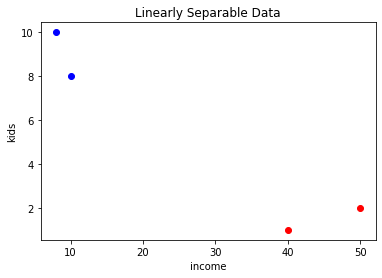

In [ ]:
#scatterplot linearly separable
groups = sep.groupby('class')
for name, group in groups:
  if name == -1:
    plt.scatter(group['income'], group['kids'], c = 'blue', marker = 'o', label = name)
  else:
    plt.scatter(group['income'], group['kids'], c = 'red', marker = 'o', label = name)
plt.title('Linearly Separable Data')
plt.xlabel('income')
plt.ylabel('kids')
plt.show()

In [ ]:
#perceptron with two independent variables or attributes
def perceptron (Y, X1, X2, iter = 100):
  theta_0 = 0.0
  theta = np.array([0.0, 0.0])
  #print(theta_0, theta)
  for itera in range(iter):
    for i in range(len(Y)):
      if Y[i]*(np.dot(np.array([X1[i], X2[i]]), theta) + theta_0) <= 0:
        theta_0 += Y[i]/10
        theta += Y[i]/10*(np.array([X1[i], X2[i]]))
  theta_0 = np.array(theta_0)
  #devuelve un numpy array de thetas
  return np.concatenate((theta_0, theta), axis = None)

In [ ]:
#theta vector
thetas = perceptron(sep['class'], sep['income'], sep['kids'], iter = 50)
print(thetas)

[-0.2  1.2 -2.5]


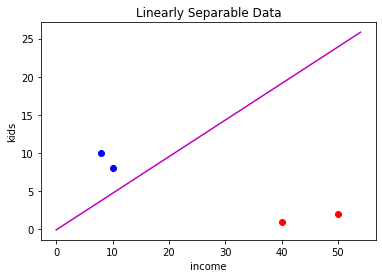

In [ ]:
#vector to graph
exes = []
for i in range(55):
  exes.append(i)
exes = np.array(exes)

separator = -thetas[1]/thetas[2]*exes - thetas[0]/thetas[2]

groups = sep.groupby('class')
for name, group in groups:
  if name == -1:
    plt.scatter(group['income'], group['kids'], c = 'blue', marker = 'o', label = name)
  else:
    plt.scatter(group['income'], group['kids'], c = 'red', marker = 'o', label = name)

plt.plot(exes, separator, color = 'm')
plt.title('Linearly Separable Data')
plt.xlabel('income')
plt.ylabel('kids')
plt.show()

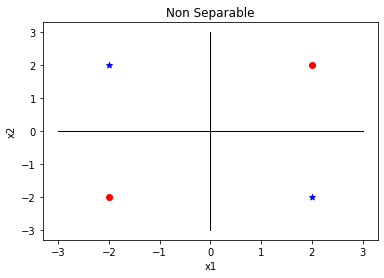

In [ ]:
#non separable graph
#axis
axis_points = []
for number in range(-3, 4):
  axis_points.append(number)

x_axis = np.array(axis_points)
y_axis = np.array(axis_points)

groups = non_sep.groupby('class')
for name, group in groups:
  if name == -1:
    plt.scatter(group['x1'], group['x2'], c = 'b', marker = '*', label=name)
  else:
    plt.scatter(group['x1'], group['x2'], c = 'r', marker = 'o', label=name)
plt.title('Non Separable')
plt.xlabel('x1')
plt.ylabel('x2')
#x axis
plt.plot(x_axis, np.full(7,0), color = 'black', linewidth = 1)
#y axis
plt.plot(np.full(7,0), y_axis, color = 'black', linewidth = 1)
plt.show()

In [ ]:
non_sep['trick'] = non_sep['x1']*non_sep['x2']
print(non_sep)

   class  x1  x2  trick
0      1   2   2      4
1      1  -2  -2      4
2     -1   2  -2     -4
3     -1  -2   2     -4


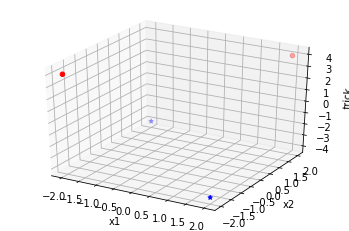

In [ ]:
#Graph the points in a superior dimension
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

blue_x = np.concatenate((non_sep.loc[2,'x1'], non_sep.loc[3, 'x1']), axis = None)
blue_y = np.concatenate((non_sep.loc[2,'x2'], non_sep.loc[3, 'x2']), axis = None)
blue_z = np.concatenate((non_sep.loc[2,'trick'], non_sep.loc[3, 'trick']), axis = None)

red_x = np.concatenate((non_sep.loc[0,'x1'], non_sep.loc[1, 'x1']), axis = None)
red_y = np.concatenate((non_sep.loc[0,'x2'], non_sep.loc[1, 'x2']), axis = None)
red_z = np.concatenate((non_sep.loc[0,'trick'], non_sep.loc[1, 'trick']), axis = None)

#points stars and spheres
ax.scatter(blue_x, blue_y, blue_z, c = 'blue', marker='*')
ax.scatter(red_x, red_y, red_z, c = 'red', marker='o')

#labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('trick')

plt.show()

In [ ]:
#perceptron two independent variables and kernel trick
def perceptron_3d (Y, X1, X2, trick, iter = 100):
  theta_0 = 0.0
  theta = np.array([0.0, 0.0, 0.0])
  #print(theta_0, theta)
  for itera in range(iter):
    for i in range(len(Y)):
      if Y[i]*(np.dot(np.array([X1[i], X2[i], trick[i]]), theta) + theta_0) <= 0:
        theta_0 += Y[i]
        theta += Y[i]*(np.array([X1[i], X2[i], trick[i]]))
  theta_0 = np.array(theta_0)
  #devuelve un numpy array de thetas
  return np.concatenate((theta_0, theta), axis = None)

In [ ]:
#store the return of the function in variable thetas
thetas = perceptron_3d(non_sep['class'], non_sep['x1'], non_sep['x2'], non_sep['trick'])
print(thetas)

[1. 2. 2. 4.]


In [ ]:
#assess the prediction capacity
y_pred = thetas[0] + thetas[1]*non_sep['x1'] + thetas[2]*non_sep['x2'] + thetas[3]*non_sep['trick']

In [ ]:
#define the betas of the plane
b0 = -thetas[0]/thetas[3]
b1 = -thetas[1]/thetas[3]
b2 = -thetas[2]/thetas[3]

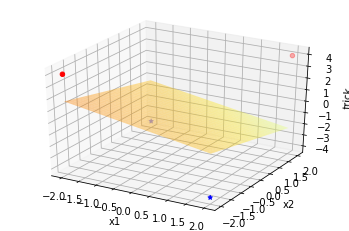

In [ ]:
def line(x1, x2, b0, b1, b2):
  return b0 + b1*x1 + b2*x2

x1 = np.linspace(-2,2,30)
x2 = np.linspace(-2,2,30)

X1, X2 = np.meshgrid(x1, x2)
Y = line(X1, X2, b0, b1, b2)

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(blue_x, blue_y, blue_z, c = 'blue', marker='*')
ax.scatter(red_x, red_y, red_z, c = 'red', marker='o')

#graph the separator hyperplane
ax.plot_surface(X1, X2, Y, cmap = 'Wistia', alpha = 0.4)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('trick')

plt.show()